# Escalamiento, normalización y Estandarización de datos

In [2]:
# Importamos las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

datos = pd.read_csv("datos_personas.csv")
datos

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


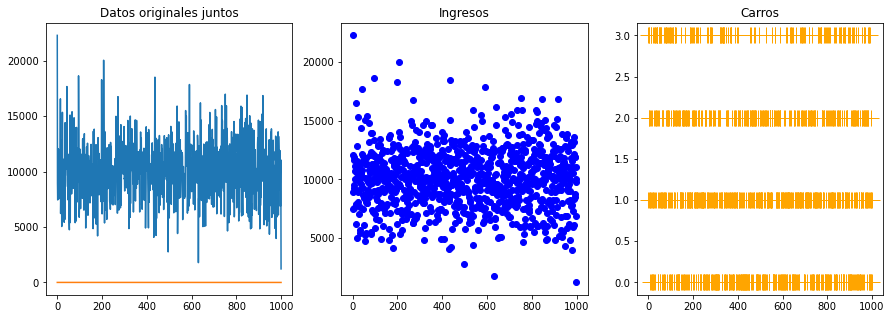

In [5]:
# Graficamos los datos para observar la necesidad del 
# escalamiento, normalización y estandarización.
# Primero se crea una figura con 3 subfiguras dentro.
# Subplot (renglón, columnas, posición)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# Se realizarán 3 gráficos, datos originales juntos, ingresos y carros 
# Se añaden los títulos y los datos que se graficaran.
ax1.set_title("Datos originales juntos")
ax1.plot(datos)
ax2.set_title("Ingresos")
ax2.plot(datos["ingreso"],linewidth=0,marker="o", color="blue",markersize=6)
ax3.set_title("Carros")
ax3.plot(datos["carros"], linewidth=0,marker="+", color="orange",markersize=16)
plt.show()

In [ ]:
# En el primer gráfico se observa la fluctuación de los salarios contra la cantidad
# de autos, lo cual es imperceptible dado que los salarios tienen valores grandes.
# En los gráficos 2 y 3 se observan mejor los datos dado que cada uno tiene su
# propia escala.

# Observemos como se distribuyen los datos

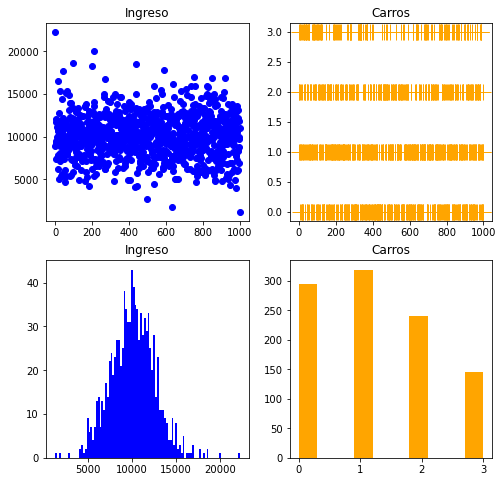

In [7]:
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
# Las gráficas 2 y 3 del código anterior.
ax1.set_title("Ingreso")
ax1.plot(datos["ingreso"], linewidth=0,marker="o", color="blue",markersize=6)
ax2.set_title("Carros")
ax2.plot(datos["carros"],linewidth=0,marker="+", color="orange",markersize=16)
# Los histogramas de distribución de los datos ingreso y carros.
ax3.set_title("Ingreso")
ax3.hist(datos["ingreso"],bins=100, color="blue")
ax4.set_title("Carros")
ax4.hist(datos["carros"],color="orange")
plt.show()

In [8]:
# La tercer gráfica tiene una forma un poco normal con media aproximadamente de 
# 1000, mientras la cuarta no tiene una forma conocida.

# Técnicas de homogenización.

# Escala en función del mínimo y máximo.

In [10]:
# Utilizamos el preprocesamiento de sklearn. Utilizamos un fit_transform el cual 
# recibe los datos y los convierte a arreglos de numpy (datos_min_max)
datos_min_max=preprocessing.MinMaxScaler().fit_transform(datos)
datos_min_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

In [12]:
# los nuevos datos están ordenados del máximo al mínimo valor de los datos, 
# en la primer columna se encuentra el salario y en la segunda la cantidad
# de autos, el máximo salario ahora se corresponde con el 1 y el mínimo con el 0.
# Ahora ambos tipos de datos tienen la misma escala.

# Normalización en función de la norma del vector.

In [14]:
datos_normalizer = preprocessing.Normalizer().transform(datos.T)
datos_normalizer=datos_normalizer.T
# fórmula del normalizado norm=X/raíz cuadrada (X_1^2+X_2^2+...)
datos_normalizer

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

In [15]:
# Normalizer trabaja con renglones y no con columnas, por ello se utilizan las
# transpuestas transform(datos.T), el .T significa traspuesta.

# Estandarización (desv_std=1,media=0).

In [16]:
# Consiste en cambiar la distribución de los datos para que tengan desviación
# estándar 1 y media 0, es decir, distribución Normal, ya que muchas técnicas
# de aprendizaje de máquina trabajan con el supuesto de que los datos tienen
# este tipo de distribución.
datos_standard_scaler=preprocessing.StandardScaler().fit_transform(datos)
# Estandarizado=(X-media)/std

datos_robust_scaler=preprocessing.RobustScaler().fit_transform(datos)
# Estandarizado=(X-rango_intercuartílico)/std

datos_standard_scaler, datos_robust_scaler

(array([[ 4.81555174,  1.70892042],
        [-0.4413019 , -0.23193185],
        [-1.04273197,  0.73849429],
        ...,
        [-0.12678303, -0.23193185],
        [ 0.38122719, -0.23193185],
        [-3.49719763, -1.20235798]]),
 array([[ 3.70548334,  1.        ],
        [-0.3376601 ,  0.        ],
        [-0.80023109,  0.5       ],
        ...,
        [-0.09575781,  0.        ],
        [ 0.29496225,  0.        ],
        [-2.68800607, -0.5       ]]))

In [19]:
# Observemos que nuestros datos ahora tienen valores negativos.
# Utilizamos el rango intercuartílico para evitar los datos atípicos o outliers.
# Datos_robust es de los más utlizados.

 # Comparación de métodos con la variable "ingreso".

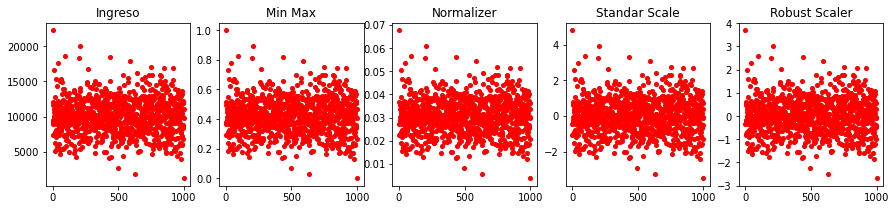

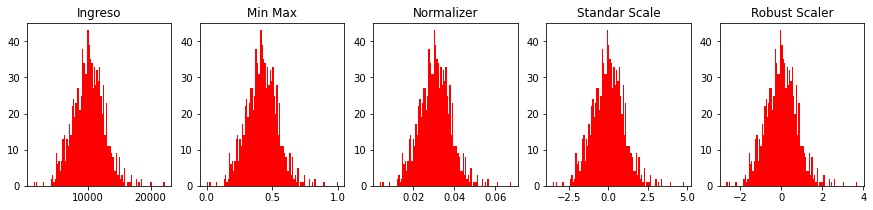

In [26]:
# Convertir vectores de numpy a DataFrames para graficarlos
datos_min_max=pd.DataFrame(datos_min_max, columns=["ingreso","carros"])
datos_normalizer=pd.DataFrame(datos_normalizer, columns=["ingreso","carros"])
datos_standard_scaler=pd.DataFrame(datos_standard_scaler, columns=["ingreso","carros"])
datos_robust_scaler=pd.DataFrame(datos_robust_scaler, columns=["ingreso","carros"])

# Creamos la figura con las 5 subfiguras pertenecientes a cada método.
fig=plt.figure(figsize=(15,3))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

# Creación de las subgráficas de cada método.
ax1.set_title("Ingreso")
ax1.plot(datos["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

ax4.set_title("Standar Scale")
ax4.plot(datos_standard_scaler["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

plt.show()

# Creamos los histogramas
fig=plt.figure(figsize=(15,3))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

# Creación de las subgráficas de cada método.
ax1.set_title("Ingreso")
ax1.hist(datos["ingreso"],color="red",bins=100)

ax2.set_title("Min Max")
ax2.hist(datos_min_max["ingreso"],color="red",bins=100)

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["ingreso"],color="red",bins=100)

ax4.set_title("Standar Scale")
ax4.hist(datos_standard_scaler["ingreso"],color="red",bins=100)

ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler["ingreso"],color="red",bins=100)

plt.show()

In [28]:
# Independientemente del transformador utilizado los datos son muy similares, 
# aunque las escalas son diferentes.
# La gráfica de Normalizer esta comprimiendo mucho los datos.

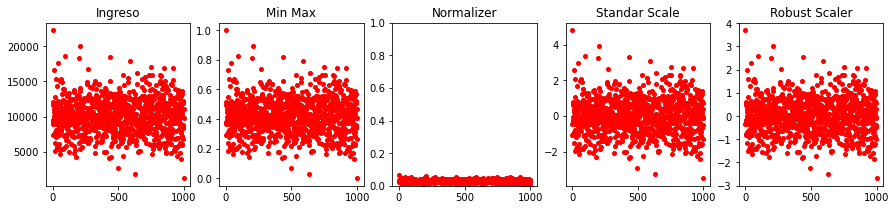

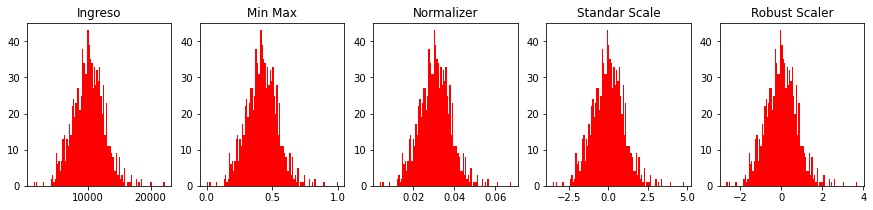

In [29]:
# Veamos esto último haciendo un ajuste en la gráfica Normalizer.
# Convertir vectores de numpy a DataFrames para graficarlos
datos_min_max=pd.DataFrame(datos_min_max, columns=["ingreso","carros"])
datos_normalizer=pd.DataFrame(datos_normalizer, columns=["ingreso","carros"])
datos_standard_scaler=pd.DataFrame(datos_standard_scaler, columns=["ingreso","carros"])
datos_robust_scaler=pd.DataFrame(datos_robust_scaler, columns=["ingreso","carros"])

# Creamos la figura con las 5 subfiguras pertenecientes a cada método.
fig=plt.figure(figsize=(15,3))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

# Creación de las subgráficas de cada método.
ax1.set_title("Ingreso")
ax1.plot(datos["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["ingreso"],linewidth=0,marker="o",color="red",markersize=4)
ax3.set_ylim(0,1)

ax4.set_title("Standar Scale")
ax4.plot(datos_standard_scaler["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler["ingreso"],linewidth=0,marker="o",color="red",markersize=4)

plt.show()

# Creamos los histogramas
fig=plt.figure(figsize=(15,3))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

# Creación de las subgráficas de cada método.
ax1.set_title("Ingreso")
ax1.hist(datos["ingreso"],color="red",bins=100)

ax2.set_title("Min Max")
ax2.hist(datos_min_max["ingreso"],color="red",bins=100)

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["ingreso"],color="red",bins=100)

ax4.set_title("Standar Scale")
ax4.hist(datos_standard_scaler["ingreso"],color="red",bins=100)

ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler["ingreso"],color="red",bins=100)

plt.show()

In [30]:
# Por esta razón Normalizer no es tan utilizada.